In [2]:
import torch
torch.cuda.is_available()

False

In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.8088, 0.1661, 0.9363],
        [0.6971, 0.7475, 0.7783],
        [0.6093, 0.4706, 0.9407],
        [0.4766, 0.8783, 0.7527],
        [0.0071, 0.9610, 0.8926]])


In [4]:
import torchvision

In [5]:
tensor = torch.ones(4,4)
print('First row: ', tensor[0])
print('First column: ', tensor[:,0])
print('Lsat column: ', tensor[..., -1])

tensor[:,1] = 0
print(tensor)

First row:  tensor([1., 1., 1., 1.])
First column:  tensor([1., 1., 1., 1.])
Lsat column:  tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [6]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
t2 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)
print(t2)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [7]:
# 두 텐서 간의 행렬 곱(matrix multiplication)을 계산합니다. y1, y2, y3은 모두 같은 값을 갖습니다.
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(tensor)
print(torch.matmul(tensor, tensor.T, out=y3))


# 요소별 곱(element-wise product)을 계산합니다. z1, z2, z3는 모두 같은 값을 갖습니다.
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
print(torch.mul(tensor, tensor, out=z3))

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [8]:
agg = tensor.sum()
print(agg, type(agg))
agg_item = agg.item()
print(agg_item, type(agg_item))

tensor(12.) <class 'torch.Tensor'>
12.0 <class 'float'>


In [9]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [10]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [11]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [12]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

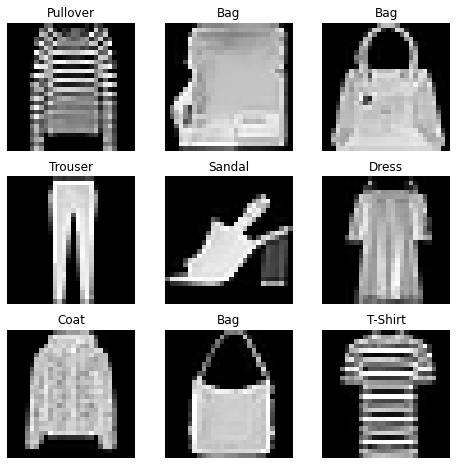

In [13]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3
for i in range(1, cols*rows +1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [14]:
import pandas as pd
class CustomImageDataset(Dataset):
    def __init__(self, annotation_file, img_dir, transform=None, target_transform = None):
        self.img_labels = pd.read_csv(annotation_file, names=['file_name', 'label'])
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)

    def __gettiem__(self):
        img_path = pd.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_label.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [15]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


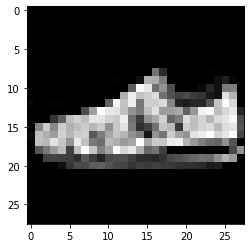

Label: 7


In [19]:
# 이미지와 정답(label)을 표시합니다.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [20]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y : torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

In [31]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using {device} device')

Using cpu device


In [28]:
import os
import torch
from torch import nn
from torch.utils.data import dataloader
from torchvision import datasets, transforms

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [32]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [34]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim = 1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([4])


In [36]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


In [37]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [38]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [39]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.1398,  0.1300, -0.4480,  0.0873,  0.0630,  0.2313,  0.0814, -0.0268,
          0.1371,  0.4841,  0.5201, -0.6220,  0.3545,  0.0666, -0.0903,  0.0583,
         -0.5316, -0.1442, -0.2205, -0.2645],
        [ 0.0312,  0.0895, -0.4013,  0.0984,  0.1138,  0.4327,  0.1292, -0.5053,
          0.3526,  0.8407,  0.6597, -0.2169,  0.3699,  0.4298, -0.0773, -0.0455,
         -0.4188, -0.2425, -0.1993, -0.1681],
        [-0.1938,  0.1271, -0.5811,  0.3167, -0.1359,  0.1940,  0.1410, -0.2951,
          0.2347,  0.4642,  0.6469,  0.0654,  0.4116,  0.2627, -0.0705, -0.0837,
         -0.4934,  0.0025,  0.1276, -0.2736]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.1398, 0.1300, 0.0000, 0.0873, 0.0630, 0.2313, 0.0814, 0.0000, 0.1371,
         0.4841, 0.5201, 0.0000, 0.3545, 0.0666, 0.0000, 0.0583, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0312, 0.0895, 0.0000, 0.0984, 0.1138, 0.4327, 0.1292, 0.0000, 0.3526,
         0.8407, 0.6597, 0.0000, 0.3699, 0.4298, 0.00

In [40]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [41]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

In [42]:
print("Model structure: ", model, "\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size : {param.size()} | Value : {param[:2]} \n")

Model structure:  NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
) 


Layer: linear_relu_stack.0.weight | Size : torch.Size([512, 784]) | Value : tensor([[ 0.0295, -0.0129,  0.0280,  ..., -0.0148, -0.0211,  0.0064],
        [ 0.0159, -0.0010,  0.0289,  ...,  0.0251,  0.0205,  0.0160]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size : torch.Size([512]) | Value : tensor([-0.0144, -0.0081], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size : torch.Size([512, 512]) | Value : tensor([[-0.0131, -0.0211, -0.0143,  ..., -0.0250,  0.0341, -0.0440],
        [-0.0286, -0.0331,  0.0190,  ..., -0.0293,  0.0070,  0.0049]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias 